In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from DecisionTree import DecisionTree
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from BaggingClassifier import BaggingClassifier
%run DecisionTree.py


In [30]:
# Load dataset
data = pd.read_csv('heart.csv')

# Binary encoding for 'Sex' and 'ExerciseAngina'
data['Sex'] = data['Sex'].map({'M': 1, 'F': 0})
data['ExerciseAngina'] = data['ExerciseAngina'].map({'Y': 1, 'N': 0})

# Extract features and labels
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']


In [31]:
# One-Hot Encoding for non-binary categorical features
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
encoder = OneHotEncoder(sparse=False)

if categorical_cols:  # Only encode if there are categorical features
    encoded_array = encoder.fit_transform(X[categorical_cols])
    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))
    X = pd.concat([X.drop(columns=categorical_cols), encoded_df], axis=1)

# Convert DataFrame to NumPy array
X = X.to_numpy()
y = y.to_numpy()

d:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [32]:
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#X_val (10%) → Used for hyperparameter tuning.
# X_test (20%) → Used for final evaluation.
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=2/3, random_state=42, stratify=y_temp
)



In [33]:
# Train the DecisionTree model
model = DecisionTree()
model.fit(X_train, y_train)

print("Training Complete!")

Training Complete!


In [34]:
val_set = model.predict(X_val)
# compute accuracy
accuracy = np.sum(val_set == y_val) / len(y_val)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.8478


In [35]:
# train sklearn's DecisionTreeClassifier
sklearn_model = DecisionTreeClassifier( random_state=42)
sklearn_model.fit(X_train, y_train)

# predict on validation set
val_set = sklearn_model.predict(X_val)
# compute accuracy
accuracy = accuracy_score(y_val, val_set)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.8587


In [36]:
# Train the Bagging Classifier
bagging_model = BaggingClassifier(base_learner=DecisionTree, n_estimators=20)
bagging_model.fit(X_train, y_train)


use X_val to tune the model during training, and use X_test to evaluate the model after training.

In [37]:
# Predict using Bagging Classifier
val_set = bagging_model.predict(X_val)
# Compute accuracy
accuracy = accuracy_score(y_val, val_set)
print(f"Bagging Classifier Validation Accuracy: {accuracy:.4f}")


Bagging Classifier Validation Accuracy: 0.9022


Bagging Classifier evaluation

In [38]:
# Predict using Bagging Classifier
y_pred = bagging_model.predict(X_test)

# Compute Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [39]:
# Print accuracy and F1-score
print(f"Bagging Classifier Test Accuracy: {accuracy:.4f}")
print(f"Bagging Classifier F1-Score: {f1:.4f}")

Bagging Classifier Test Accuracy: 0.8913
Bagging Classifier F1-Score: 0.9000


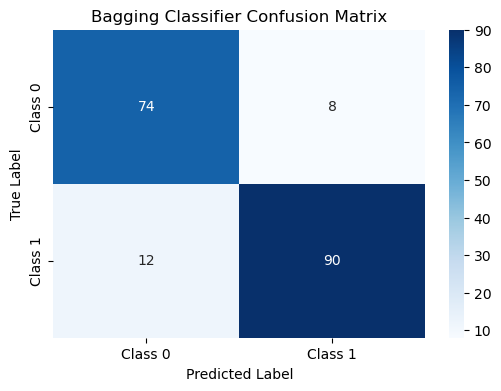

In [42]:
# Plot Confusion Matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

plot_confusion_matrix(conf_matrix, "Bagging Classifier Confusion Matrix")

In [ ]:
# train logistic regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# predict on validation set
val_set = logistic_model.predict(X_val)
# compute accuracy
accuracy = accuracy_score(y_val, val_set)

print(f"Validation Accuracy: {accuracy:.4f}")


In [49]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np


In [50]:
# Hyper-parameters 
input_size = 18
hidden_size = 100 
num_classes = 2
num_epochs = 20
batch_size = 64
learning_rate = 0.001

In [ ]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long) 

x_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
print(X_train_tensor.shape)
print(X_train.shape)
print(y_train_tensor.shape)
# Create a TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# Create DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=TensorDataset(x_val_tensor, y_val_tensor), batch_size=batch_size, shuffle=False)

torch.Size([642, 18])
(642, 18)
torch.Size([642])


In [ ]:
class NeuralNet(nn.Module):
  def __init__(self, input_size,hidden_size,output_size):
    super(NeuralNet,self).__init__()
    self.input_size = input_size
    self.l1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,output_size)  

  def forward(self,x):
    output = self.l1(x)
    output = self.relu(output)
    output = self.l2(output)
    return output

model = NeuralNet(input_size, hidden_size, 2)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)


for epoch in range(num_epochs):
  for _,(example, lab) in enumerate(train_loader): 
    out = model.forward(example)
    loss = criterion(out,lab)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for example, labels in test_loader:
        outputs = model(example)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = (n_correct / n_samples) * 100.0
    print(f'Accuracy of the network : {acc} %')

Accuracy of the network : 72.82608695652173 %
